# Directions

## Part 1

### Q1. Download the customer data set and add it to your “Original Data” folder.

 - **Done.**

### Q2. Create a new notebook in your “Scripts” folder for part 1 of this task.

 - **Done.**

### Q3. Import your analysis libraries, as well as your new customer data set as a dataframe.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#%matplotlib inline: to remove <AxesSubplot:xlabel='income', ylabel='income'> from my charts9Suzan tip!

In [2]:
path = r'C:\Users\Ruth Kassaye\Documents\CareerFoundery\DataImmersion\Achievement_4'

In [3]:
# Importing customers.csv file
customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

In [4]:
# Checking the number of rows and columns of customers dataframe
customers.shape

(206209, 10)

In [5]:
# Importing orders_products_merged_grouped.pkl files
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_grouped.pkl'))

### Q4. Wrangle the data so that it follows consistent logic; for example, rename columns with illogical names and drop columns that don’t add anything to your analysis.

In [6]:
customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


### Renaming the columns titles to match with the dataframe titles I am going to merge at a later stage

In [7]:
customers.rename(columns ={'First Name': 'first_name'}, inplace = True)

In [8]:
customers.rename(columns ={'Surnam': 'surname'}, inplace = True)

In [9]:
customers.rename(columns ={'STATE': 'state'}, inplace = True)

In [10]:
customers.rename(columns ={'Age': 'age'}, inplace = True)

In [11]:
customers.rename(columns ={'Gender': 'gender'}, inplace = True)

In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   first_name    194950 non-null  object
 2   surname       206209 non-null  object
 3   gender        206209 non-null  object
 4   state         206209 non-null  object
 5   age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [13]:
customers.shape

(206209, 10)

#### Checking describtive and conducting an exploratory analysis using scatterplot to visually check if there are outliers

In [14]:
customers.describe()

,user_id,age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


<AxesSubplot:xlabel='income', ylabel='income'>

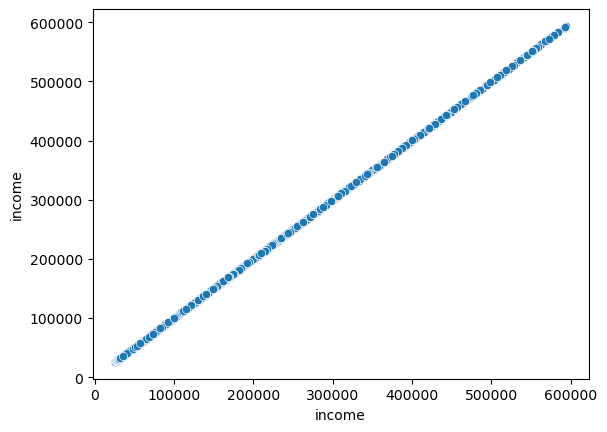

In [15]:
sns.scatterplot(x = 'income', y = 'income', data = customers)

### Q5. Complete the fundamental data quality and consistency checks you’ve learned throughout this Achievement; for example, check for and address missing values and duplicates, and convert any mixed-type data.

In [16]:
# Checking missing values 

customers.isnull().sum()

user_id             0
first_name      11259
surname             0
gender              0
state               0
age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64

In [17]:
# Storing the missing first_name records in df_nan dataframe
df_nan = customers[customers['first_name'].isnull() == True]

In [18]:
# calling df_nan dataframe to print out the missing records
df_nan.head(10)

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
53,76659,NaN,Gilbert,Male,Colorado,26,1/1/2017,2,married,41709
73,13738,NaN,Frost,Female,Louisiana,39,1/1/2017,0,single,82518
82,89996,NaN,Dawson,Female,Oregon,52,1/1/2017,3,married,117099
99,96166,NaN,Oconnor,Male,Oklahoma,51,1/1/2017,1,married,155673
105,29778,NaN,Dawson,Female,Utah,63,1/1/2017,3,married,151819
128,8562,NaN,Oconnor,Male,Utah,46,1/1/2017,1,married,134898
140,149267,NaN,Hutchinson,Male,South Carolina,20,1/1/2017,0,single,86778
149,82632,NaN,Orr,Male,Hawaii,61,1/1/2017,1,married,118130
155,172331,NaN,Williamson,Female,Alaska,27,1/1/2017,0,single,55047
236,182963,NaN,Nicholson,Female,New Mexico,58,1/2/2017,1,married,163391


 - **My decision**: I kept the missing values as still I have their last names and usser_id. My client can identify them. Afterall they still have other valuable data

In [19]:
# This code creates a new df_dups subset dataframe, from the customers dataframe,containing only rows that are duplicates.

df_dups = customers[customers.duplicated()]

In [20]:
# Calling df_dups to check for duplicated vaues
df_dups

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income


 - **Reflection**: no duplicated value found.

In [21]:
# Check for mixed types
for col in customers.columns.tolist(): 
    weird = (customers[[col]].applymap(type) != customers[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (customers[weird]) > 0:
        print(col)

first_name


- first_name should be a string data type. Hence, I used the following command to make the column to string data type

In [22]:
customers['first_name'] = customers['first_name'].astype('str')

In [23]:
# Checking again my data type issue is resolved
df_dups_2 = customers[customers.duplicated()]

In [24]:
df_dups_2

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income


 - **Great!**, now the customers dataframe doesn't have mixed data type

In [38]:
customers.shape

(206209, 10)

### Q6. Combine your customer data with the rest of your prepared Instacart data. Tip: Make sure the key columns are of the same data type! Hint: Make sure the key columns are the same data type!

In [25]:
# printing customers dataframe to check if it successfully imported 
customers.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [26]:
# calling the ords_prods_merge database to see if the dataframes have a common column 
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_flag,median_days_since_prior_order,frequency_flag
0,2539329,1,1,2,8,7.0,196,1,0,both,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,both,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,both,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer


### Merging step

#### Step one: determine the common identifier of the two dataframes that are going to be merged

 - **Answer**: user_id is the common identifier 

#### Step two: checking the key column, user_id, data types of the two dataframes

In [27]:
# Checking columns datatypes of the customer dataframe
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   first_name    206209 non-null  object
 2   surname       206209 non-null  object
 3   gender        206209 non-null  object
 4   state         206209 non-null  object
 5   age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


 - **Reflection**: the user_id data type of customers dataframe is int64

In [28]:
# Checking user_id datatypes of the customer dataframe
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 24 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     int32   
 7   add_to_cart_order              int8    
 8   reordered                      int8    
 9   _merge                         category
 10  product_name                   object  
 11  aisle_id                       int32   
 12  department_id                  int32   
 13  prices                         float32 
 14  price_range_loc                object  
 15  busiest_day                    object  
 16  busiest_days                   object  
 17  busiest_period_of_day    

 - **Reflection**: the user_id data type of ords_prods_merge dataframe is int32

#### The anaysis above shows that user_id's datatype in the two dataframe that are going to be merged is different. Hence, I need to standardize the data type.

   - **Tip**: I chose int32 to save memory. 

In [29]:
# Changing the user_id type of the customers dataframe from int64 to int32
customers['user_id']=customers['user_id'].astype('int32')

In [30]:
# Calling customers dataframe to check if user_id data type is changed to int32
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int32 
 1   first_name    206209 non-null  object
 2   surname       206209 non-null  object
 3   gender        206209 non-null  object
 4   state         206209 non-null  object
 5   age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int32(1), int64(3), object(6)
memory usage: 14.9+ MB


#### Step 4: Merging the two dataframes 
 
 

  - Determining combining method:

In [31]:
# Checking the number of rows and columns 
customers.shape

(206209, 10)

In [32]:
# Checking the number of rows and columns 
ords_prods_merge.shape

(32404859, 24)


  - Given the two dataframes have different shapes, I should use the **mergeing** function to combine the two dataframes
  - I have used the inner merging option to get the porudcts_id that are found in both dataframes

In [33]:
# Merging ords_prods_merge and customers dataframes using a key column user_id
ords_prods_custs = ords_prods_merge.merge(customers, on = 'user_id')

In [34]:
ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,7.0,196,1,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [39]:
ords_prods_custs.shape

(32404859, 33)

### Q8. Export this new dataframe as a pickle file so you can continue to use it in the second part of this task.

### Q9. Save your notebook so that you can send it to your tutor for review after completing part 2.

In [35]:
# Exporting the ords_prods_custs dataframe as a pickle format

ords_prods_custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merged.pkl'))